In [24]:
# 因子モデルの因子分析

# 「因子分析」とは、p個の変数の変動メカニズムを少数の共通の要因によって単純化(縮約)するための分析手法である。
# 共通の要因は「共通因子」と呼ばれる。
# xijを生徒iの問jの得点とする。ここでは、変数間の分布を調整するために、xijは問ごとに平均0、標準偏差1に標準化されているものとする。
# 生徒iの共通因子の値をfiと書くことにする。fiは生徒iの「因子スコア」という。
# 共通因子は各問の得点の情報を縮約したものなので、分析前の段階では何かは分からない。分析の過程で解釈が与えられる。
# いま、f1,.., fn~N(0,1), i.i.dを仮定する。つまり、E[fi]=0, V[fi]=1である。
# xijが一つの共通因子fiの関数として xij=aj*fi+dj*uij のように定まることを想定したモデルを「1因子モデル」という。
# ajは「因子負荷量」といい、共通因子と各問の関係を表す係数である。問ごとには異なるが、各生徒間では共通である。
# di*uijはxijの変動のうち共通因子では説明できなかった部分である。
# uijは「独自性因子」という変数で、各iについてui1,.,.uip~N(0,1), i.i.dを仮定する。
# また、fiとuijは互いに独立であると仮定する。dj>0は「独自係数」というパラメータで、dj*uijの標準偏差である。
# 以上の仮定のもとで、V[xij] = aj^2+dj^2 = 1 となることがわかる。
# aj^2はxijの変動のうちで共通因子で説明できた部分で、問jの「共通性」という。
# dj^2はxijの変動のうちで共通因子で説明できなかった部分で、問jの「独自性」という。

# ワインデータで実践
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

wine = load_wine()

# データを標準化する
sc = StandardScaler()
sc.fit(wine.data)
X = sc.transform(wine.data)
X = pd.DataFrame(X, columns=wine.feature_names)

# 1因子モデルを実行
fa = FactorAnalyzer(n_factors=1, rotation=None)
fa.fit(X)

# 因子負荷量を算出
loadings_df = pd.DataFrame(data=fa.loadings_.transpose(), columns=X.columns)
loadings_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.262437,0.466352,-0.002497,0.447748,-0.256794,-0.854556,-0.951913,0.585547,-0.629636,0.168437,-0.583914,-0.798047,-0.553551


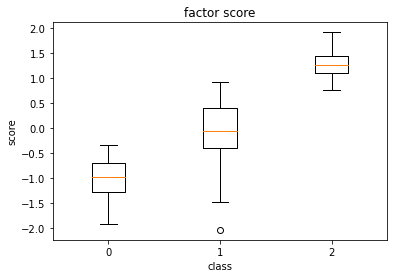

In [25]:
# クラスごとの因子スコアを箱ひげ図で表示
result_df = pd.DataFrame(fa.transform(X), columns=['factor1'])
result_df['class'] = wine.target

class0_df = result_df.loc[result_df['class']==0]["factor1"].tolist()
class1_df = result_df.loc[result_df['class']==1]["factor1"].tolist()
class2_df = result_df.loc[result_df['class']==2]["factor1"].tolist()

fig, ax = plt.subplots()
ax.boxplot([class0_df, class1_df, class2_df], labels=['0', '1', '2'])
ax.set_xlabel('class')
ax.set_ylabel('score')
plt.title("factor score")
plt.show()

In [26]:
# 多因子モデルの因子分析

# これまでは共通因子は1つだと仮定してきたが、共通要因が2つ以上存在するモデルを考えることも可能である。
# 一般に共通因子がK個のモデルは「K因子モデル」と呼ばれ、xij = ai1*fi1 +..+ aiK*fiK + dj*uij と表される。
# k番目の因子を第k因子という。

fa = FactorAnalyzer(n_factors=3, rotation=None) # 因子数3つ
fa.fit(X)

# 因子負荷量
loadings_df = pd.DataFrame(data=fa.loadings_, columns=['factor1', 'factor2', 'factor3'] ,index=X.columns)
loadings_df

# factor1: フェノール関係の特徴量? Ex, total_phenols, flavanoids, od280/od315_of_diluted_wines
# factor2: アルコール度数と色の強さ? Ex, alcohol, color_intensity
# factor3: 灰 (?) に関する特徴量? Ex, ash, alcalinity_of_ash

,factor1,factor2,factor3
alcohol,0.303696,0.718459,-0.184135
malic_acid,-0.469445,0.278685,0.086192
ash,-0.000897,0.449071,0.651790
alcalinity_of_ash,-0.510072,-0.028359,0.699151
magnesium,0.263600,0.349077,0.091006
total_phenols,0.845208,0.094727,0.166563
flavanoids,0.938545,-0.012179,0.190408
nonflavanoid_phenols,-0.580890,0.044361,0.138686
proanthocyanins,0.618387,0.042691,0.122036
color_intensity,-0.185668,0.809678,-0.108117


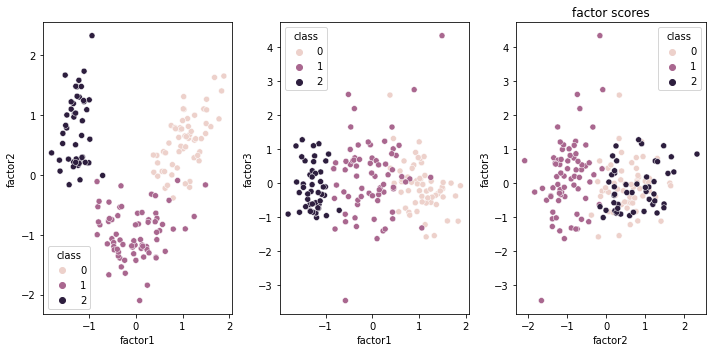

In [27]:
# 散布図で因子スコアを表示
result_df = pd.DataFrame(fa.transform(X), columns=['factor1', 'factor2', 'factor3'])
result_df['class'] = wine.target

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10.0, 5.0), nrows=1, ncols=3)
sns.scatterplot(x='factor1', y='factor2', hue='class', data=result_df, ax=ax1)
sns.scatterplot(x='factor1', y='factor3', hue='class', data=result_df, ax=ax2)
sns.scatterplot(x='factor2', y='factor3', hue='class', data=result_df, ax=ax3)
plt.title("factor scores")
plt.tight_layout()

In [28]:
# 共通性を確認することで、各変数の持つ情報が因子モデルにどれだけ反映されているかがわかる
# 共通性の小さい変数は因子モデルから削除して再度因子分析を行うとより良い結果を得ることができる
communalities_df = pd.DataFrame(data=fa.get_communalities(), columns=['communalities'] ,index=X.columns)
communalities_df

,communalities
alcohol,0.642321
malic_acid,0.305473
ash,0.626495
alcalinity_of_ash,0.749790
magnesium,0.199621
total_phenols,0.751092
flavanoids,0.917270
nonflavanoid_phenols,0.358634
proanthocyanins,0.399117
color_intensity,0.701741


In [29]:
# いまX,F,A,U,Dを X = (xij)1<=i<=n,1<=j<=p F = (fik)1<=i<=n,1<=k<=K
# A = (ajk)1<=j<=p,1<=k<=K U = (uij)1<=i<=n,1<=j<=p D = diag(d1,..,dp) とするとき、
# K因子モデルは、X = F*A^T+U*D と書くことができる
# ここで、TをT*T^Tの対角成分が全て1であるようなK*Kの正則行列とする。
# この時、X = (F*T)*(T^(-1)A^T)+U*D が成立することがわかる
# このことは上の条件を満たす任意のTを用いて、F~=F*Tを因子スコア、A~=(T^(-1)A^T)を因子負荷行列としてもよいことを表している。
# つまり、K>=2の時は、因子スコアと因子負荷行列の取り方は無数に存在する
# fik ~ N(0,1), i=1,..,n, k=1,..,K
# uij ~ N(0,1), i=1,..,n, j=1,..,p と仮定すれば、
# 最尤推定法を用いることによって、あるTにおけるA~,F~とD,Uの推定が可能である。この時のA~,F~の推定値を「初期解」という。
# K因子のモデル推定では、初期解からTを変化させて、分析結果の解釈を容易にするようなA~,F~の推定値を探索する。
# 因子の解釈を容易にするような座標軸を探索する手続きを「回転」という。
# Tを直交行列に限る場合の回転を「直交回転」という。
# 直交回転の場合、各座標軸は互いに直交したままの回転となる。fi1,..,fiKが互いに独立と仮定できる場合は直交回転を用いる。
# 「バリマックス回転」は代表的な直交回転法で、因子負荷行列の各要素を2乗してできたp*K行列の各列の分散を最大にするような直交回転と定義される。

# バリマックス回転を実行
fa_varimax = FactorAnalyzer(n_factors=3, rotation="varimax") # 因子数3つ
fa_varimax.fit(X)

loadings_varimax_df = pd.DataFrame(data=fa_varimax.loadings_, columns=['factor1', 'factor2', 'factor3'] ,index=X.columns)
print("バリマックス回転の因子負荷行列")
loadings_varimax_df

バリマックス回転の因子負荷行列


,factor1,factor2,factor3
alcohol,0.035312,0.797974,-0.065666
malic_acid,-0.494937,0.093006,0.227728
ash,0.025898,0.312247,0.726860
alcalinity_of_ash,-0.300980,-0.305777,0.752131
magnesium,0.167642,0.396137,0.120802
total_phenols,0.798142,0.336009,0.034061
flavanoids,0.920812,0.262887,0.016319
nonflavanoid_phenols,-0.519761,-0.170054,0.244057
proanthocyanins,0.591530,0.221014,0.019025
color_intensity,-0.427445,0.711506,0.113094


In [30]:
print("バリマックス回転時の共通性")
communalities_varimax_df = pd.DataFrame(data=fa_varimax.get_communalities(), columns=['communalities'] ,index=X.columns)
communalities_varimax_df

バリマックス回転時の共通性


,communalities
alcohol,0.642321
malic_acid,0.305473
ash,0.626495
alcalinity_of_ash,0.749790
magnesium,0.199621
total_phenols,0.751092
flavanoids,0.917270
nonflavanoid_phenols,0.358634
proanthocyanins,0.399117
color_intensity,0.701741


In [31]:
# 直交回転以外の回転を「斜交回転」という。プロマックス回転が有名である
fa_promax = FactorAnalyzer(n_factors=3, rotation="promax") # 因子数3つ
fa_promax.fit(X)

loadings_promax_df = pd.DataFrame(data=fa_promax.loadings_, columns=['factor1', 'factor2', 'factor3'] ,index=X.columns)
print("プロマックス回転の因子負荷行列")
loadings_promax_df

プロマックス回転の因子負荷行列


,factor1,factor2,factor3
alcohol,-0.084919,0.828240,-0.123595
malic_acid,-0.491256,0.134425,0.164368
ash,0.122195,0.220916,0.743625
alcalinity_of_ash,-0.132584,-0.375304,0.771409
magnesium,0.145143,0.369529,0.120326
total_phenols,0.801492,0.231137,0.120158
flavanoids,0.937470,0.140878,0.123795
nonflavanoid_phenols,-0.478164,-0.136055,0.197719
proanthocyanins,0.596685,0.143204,0.084610
color_intensity,-0.526873,0.779382,0.007136


In [32]:
print("プロマックス回転時の共通性")
communalities_promax_df = pd.DataFrame(data=fa_promax.get_communalities(), columns=['communalities'] ,index=X.columns)
communalities_promax_df

プロマックス回転時の共通性


,communalities
alcohol,0.708468
malic_acid,0.286419
ash,0.616714
alcalinity_of_ash,0.753503
magnesium,0.172097
total_phenols,0.710252
flavanoids,0.914022
nonflavanoid_phenols,0.286245
proanthocyanins,0.383699
color_intensity,0.885082


In [33]:
# 構造方程式

# 因子分析のパス図のように、頂点と辺からなる図を「グラフ」という。
# Vを頂点の集合、Eを辺の集合とするときに、グラフGは G = (V, E) のように表される。
# 全ての辺が矢線のグラフを「有向グラフ」という。一般に有効グラフが定義するモデルを「構造方程式モデル」という。
# 因子分析は構造方程式モデルの一種と考えることができる。
# 変数X1,X2,X3は平均0、標準偏差1に標準化されているものとする。
# この3変数間の構造方程式を以下のように定義する
# X2 = a*X1+u, X3 = b*X2+v
# ここで、u,vは誤差項で、uはX1と、vはX1,X2とそれぞれ無相関と仮定する。
# 回帰係数a,bは「パス係数」とも呼ばれる。これらは未知パラメータなので推定をする必要がある。
# ρ12をX1,X2の共分散、ρ23をX2,X3の共分散とする
# 上記の第一式にX1,第二式にX2を掛けて期待値をとれば、a=ρ12, b=ρ23を得る。
# したがって、aはX1とX2の標本共分散で、bはX2とX3の標本共分散でそれぞれ推定が可能である。
# この手続きは最小二乗法と等価である。このように、構造方程式の両辺に変数を掛けて期待値を取ることにより
# パラメータ推定を行う方法を「操作変数法」という。両辺に掛ける変数は「操作変数」という。

import semopy as sem
from semopy import Model
from semopy.examples import political_democracy

# semopyで用意されているデータセットを使用
#
# データの内訳は以下の通り
# y1	報道の自由の専門家評価 (1960)
# y2	野党の自由 (1960)
# y3	選挙の公平性 (1960)
# y4	選出された議会の有効性 (1960)
# y5	報道の自由の専門家評価 (1965)
# y6	野党の自由 (1965)
# y7	選挙の公平性 (1965)
# y8	選出された議会の有効性 (1965)
# x1	一人当たりGNP (1960)
# x2	一人当たり
# x3	産業における労働力の割合(%) (1960)
data = political_democracy.get_data()
data.head()

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679


In [34]:
# 仮説モデルを取得
#
# モデルの概要は以下の通り
# y1~y4 ... 1960年の民主主義に関する観測変数 --> dem60
# y5~y8 ... 1965年の民主主義に関する観測変数 --> dem65
# x1~x3 ... 1960年の各種産業指数 --> ind60
desc = political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [35]:
# 学習を実行
mod = Model(desc)
res = mod.fit(data)
res

SolverResult(fun=0.5083392814467889, success=True, n_it=52, x=array([2.18049353, 1.81854627, 1.25681912, 1.0581737 , 1.26518593,
       1.18574261, 1.2797166 , 1.26608392, 1.48237933, 0.57191198,
       0.8375742 , 0.62442304, 1.89274334, 1.31958852, 2.1561642 ,
       7.38529248, 0.79332879, 5.0666284 , 0.34722151, 3.14791141,
       1.35703671, 4.95436369, 0.11989392, 3.95084855, 2.35190966,
       0.46673215, 0.08157264, 0.17221   , 3.43003171, 3.25638856,
       0.44832111]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [36]:
# 学習結果のパラメータ一覧を表示する
inspect = mod.inspect()
print(inspect)

     lval  op   rval  Estimate  Std. Err    z-value   p-value
0   dem60   ~  ind60  1.482379  0.399024   3.715017  0.000203
1   dem65   ~  ind60  0.571912  0.221383   2.583364  0.009784
2   dem65   ~  dem60  0.837574  0.098446   8.507992       0.0
3      x1   ~  ind60  1.000000         -          -         -
4      x2   ~  ind60  2.180494  0.138565  15.736254       0.0
5      x3   ~  ind60  1.818546  0.151993   11.96465       0.0
6      y1   ~  dem60  1.000000         -          -         -
7      y2   ~  dem60  1.256819  0.182687   6.879647       0.0
8      y3   ~  dem60  1.058174  0.151521   6.983699       0.0
9      y4   ~  dem60  1.265186  0.145151   8.716344       0.0
10     y5   ~  dem65  1.000000         -          -         -
11     y6   ~  dem65  1.185743  0.168908   7.020032       0.0
12     y7   ~  dem65  1.279717  0.159996    7.99841       0.0
13     y8   ~  dem65  1.266084  0.158238   8.001141       0.0
14  dem60  ~~  dem60  3.950849  0.920451   4.292296  0.000018
15  dem6

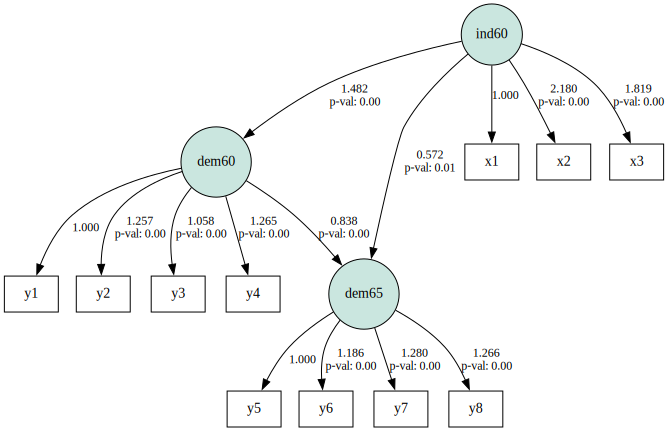

In [37]:
# パス図を描画・保存
sem.semplot(mod, "images/25_sem_graph.png")

In [40]:
# 各種適合度を確認する
stats = sem.calc_stats(mod)
print(stats.T)

                    Value
DoF             35.000000
DoF Baseline    55.000000
chi2            38.125446
chi2 p-value     0.329171
chi2 Baseline  730.654577
CFI              0.995374
GFI              0.947820
AGFI             0.918003
NFI              0.947820
TLI              0.992731
RMSEA            0.034738
AIC             60.983321
BIC            132.825453
LogLik           0.508339


In [41]:
# グラフィカルモデル

# 全ての辺が無向辺であるようなグラフを「無向グラフ」という。
# (X1,..,Xd)を多変量正規分布N(0,Σ)に従う確率ベクトル、G=(V,E)を頂点集合V={X1,..,Xd}を持つ無向グラフとする。
# グラフG上で、Xi,Xj間に辺がなければ、XiとXjがそれ以外の確率変数で条件付けた時に条件付き独立とするモデルを「グラフィカルモデル」という。
# つまり、グラフィカルモデルとは変数間の条件付き独立の関係を無向グラフで表現したモデルであると言える。
# Σ^(-1) = (σ^(i*j)) 1<=i<=d, 1<=j<=d とするとグラフG上で辺のない2頂点viとvjに対してσ^(i*j)=0を満たすモデルとも言える